In [14]:
import numpy as np
import pandas as pd
import matplotlib 

In [15]:
df=pd.read_csv("E:\DATA SCIENCE\PROJECT_1(BANGLORE_HOUSE_PRICE_PREDICTION\CVS_FILE\Bengaluru_House_Data.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df.shape

(13320, 9)

In [17]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [18]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [19]:
df1=df.drop(['area_type','availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [20]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [23]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\pilla\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df3=df2.drop(['size'],axis='columns')
df3.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [27]:
df3.dtypes

location       object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [28]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [30]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def floats(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df3[~df3['total_sqft'].apply(floats)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [33]:
def conver_sqft(x):
    token=x.split('-')
    if len(token)==2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
conver_sqft('1440')

1440.0

In [35]:
conver_sqft('1140 - 1250')

1195.0

In [36]:
df4=df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(conver_sqft)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [37]:
df4.total_sqft.unique()
df4.loc[12560]
df5=df4.dropna()
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [38]:
df5.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [39]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [40]:
df6=df5.copy()
df6['price_per_sqft']=df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [44]:
len(df6.location.unique())

1298

In [48]:
location_stat=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield                                      532
Sarjapur  Road                                  392
Electronic City                                 302
Kanakpura Road                                  264
Thanisandra                                     232
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               151
Hennur Road                                     150
7th Phase JP Nagar                              148
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
KR Puram                                         88
Hoo

In [49]:
len(location_stat[location_stat<10])

1045

In [50]:
location_stat_less_10=location_stat[location_stat<10]
location_stat_less_10

location
Medahalli                                       9
Ejipura                                         9
Chandra Layout                                  9
Yemlur                                          9
Kaverappa Layout                                9
2nd Phase JP Nagar                              9
Kamakshipalya                                   9
Jakkur Plantation                               9
Peenya                                          9
Richmond Town                                   9
Vignana Nagar                                   9
B Narayanapura                                  9
Gollahalli                                      9
Vishwanatha Nagenahalli                         9
4th Block Koramangala                           9
Banagiri Nagar                                  9
Lingarajapuram                                  9
Sector 1 HSR Layout                             9
Mathikere                                       9
Chennammana Kere                         

In [53]:
df6.location=df6.location.apply(lambda x: 'other' if x in location_stat_less_10 else x)
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [56]:
len(df6.location.unique())

254

In [63]:
df7=df6[~(df6.total_sqft/df6.bhk<300)]
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [86]:
df7[df7.total_sqft/df7.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft


In [88]:
df7.shape

(12456, 6)

In [70]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [79]:
m=np.mean(df7.price_per_sqft)
m


6308.502826047999

In [89]:
std=np.std(df7.price_per_sqft)
std
df7.shape

(12456, 6)

In [141]:
def remove_ppf(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) &(subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out
    
df8=remove_ppf(df7)
df8.head(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
152,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
341,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
5771,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509


In [100]:
import matplotlib.pyplot as plt

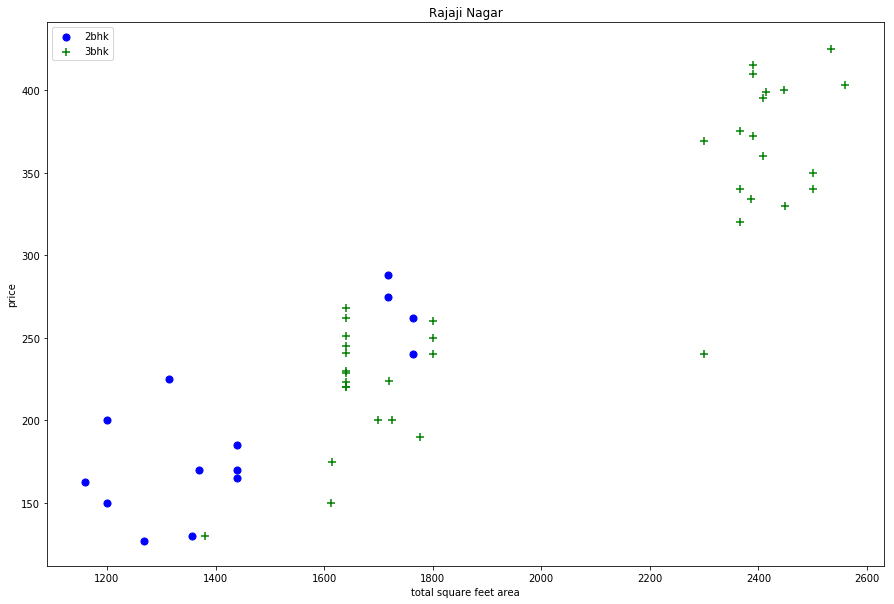

In [117]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3bhk',s=50,marker='+')
    plt.xlabel('total square feet area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

scatter_plot(df8,'Rajaji Nagar')
             

In [121]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df9=remove_bhk_outliers(df8)
df9.shape

(7380, 6)

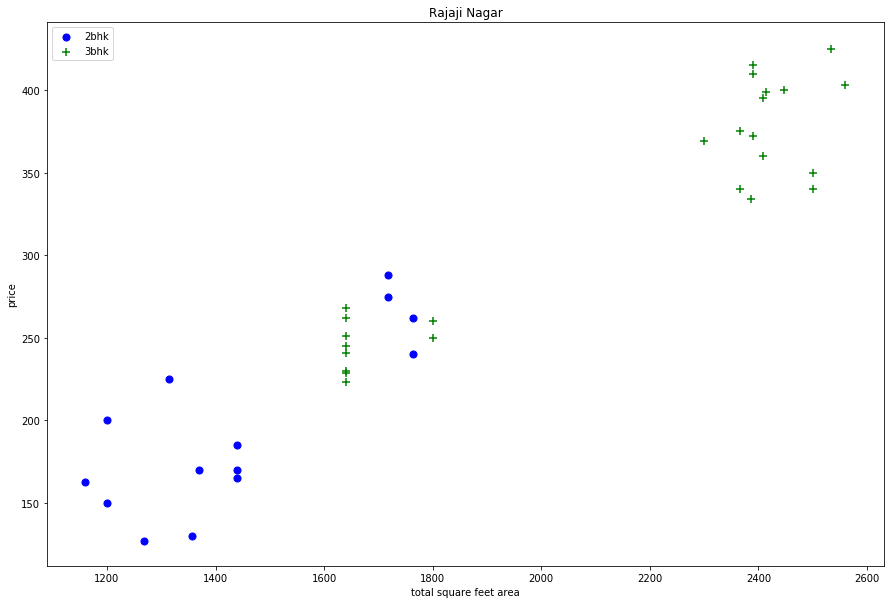

In [124]:
scatter_plot(df9,'Rajaji Nagar')

Text(0,0.5,'count')

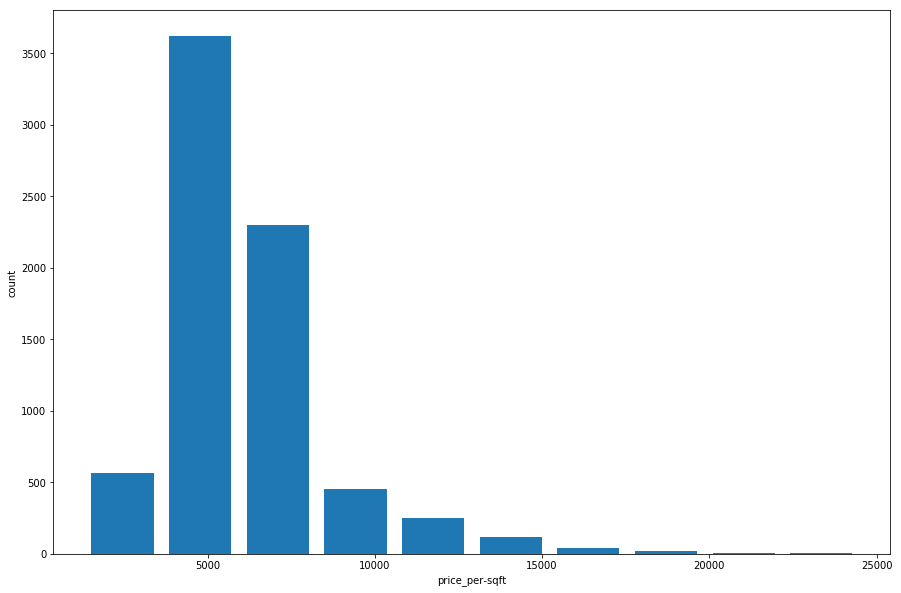

In [127]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per-sqft')
plt.ylabel('count')

In [139]:
df9.head(3)

,location,total_sqft,bath,price,bhk,price_per_sqft
341,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419


In [142]:
df10=df9[~(df9.bath>df9.bhk+2)]
df10.tail(6)

,location,total_sqft,bath,price,bhk,price_per_sqft
13223,other,1155.0,2.0,64.0,2,5541.125541
13238,other,1200.0,2.0,70.0,2,5833.333333
13245,other,1800.0,1.0,200.0,1,11111.111111
13285,other,1353.0,2.0,110.0,2,8130.081301
13291,other,812.0,1.0,26.0,1,3201.970443
13316,other,3600.0,5.0,400.0,4,11111.111111


In [136]:
df10[(df10.bath>df10.bhk+2)]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [144]:
df11=df10.drop('price_per_sqft',axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk
341,Devarachikkanahalli,1250.0,2.0,40.0,2
2474,Devarachikkanahalli,1200.0,2.0,83.0,2
5030,Devarachikkanahalli,1170.0,2.0,40.0,2
5771,Devarachikkanahalli,1425.0,2.0,65.0,3
6591,Devarachikkanahalli,947.0,2.0,43.0,2


In [147]:
dummies=pd.get_dummies(df11.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df12=pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head(3)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df13=df12.drop('location',axis='columns')
df13.head(3)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
#BULIDING MODEL

In [160]:
X=df13.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
y=df13.price
y.head() 

341     40.0
2474    83.0
5030    40.0
5771    65.0
6591    43.0
Name: price, dtype: float64

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [171]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8664372641150468